Plot activity per neurons for all mice 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read a specific Excel sheet by sheet name
df = pd.read_excel('C:/Users/Manip2/ANALYSIS/Analysis_AB/Activity_Per_Neurons_ALL_L1_AB.xlsx', sheet_name='ALL')

columns_to_check = ['Wake', 'NREM', 'N2', 'REM']
mask = df[columns_to_check].eq(0).all(axis=1)

# Filter out rows where all specified columns are zero
df_UnitToKeep= df[~mask]



In [2]:
df_UnitToKeep

,Unnamed: 0,sessions,Wake,NREM,N2,REM,AllSleep,AllNREM,Mice
0,0,4,164.781145,5.777056,2.797468,6.044944,5.441270,5.341959,BlaL
1,1,3,37.035971,41.903904,166.545455,0.000000,50.075294,56.450928,BlaL
2,2,2,144.352941,2.555556,0.000000,0.000000,2.151079,2.273764,BlaL
3,3,4,214.612795,28.714286,32.139241,23.955056,28.471429,29.214418,BlaL
4,4,4,158.922559,27.580087,2.455696,16.730337,22.896825,23.911275,BlaL
...,...,...,...,...,...,...,...,...,...
340,65,1,1.000000,26.000000,24.000000,0.000000,21.702970,25.488372,RL
345,70,1,0.000000,1.000000,0.000000,2.000000,0.930693,0.744186,RL
347,72,1,1.000000,14.000000,1.000000,31.000000,13.693069,10.674419,RL
348,73,1,6.000000,29.000000,4.000000,85.000000,31.871287,22.604651,RL


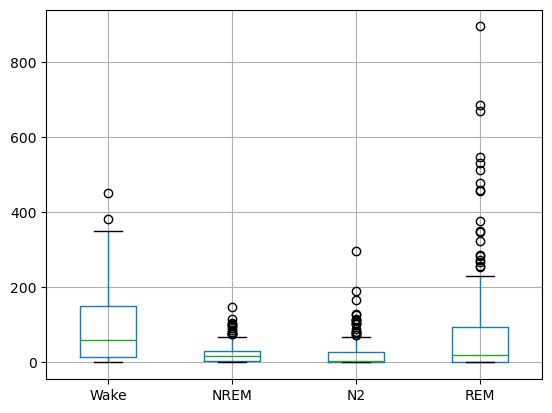

In [3]:
df_UnitToKeep.boxplot(column=['Wake', 'NREM', 'N2', 'REM'])
plt.show()

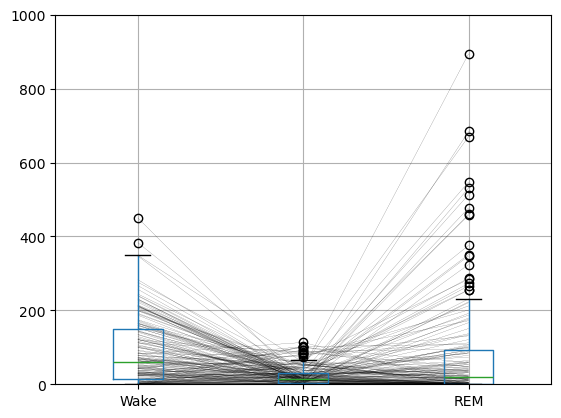

In [6]:
selected_columns=['Wake', 'AllNREM', 'REM']
# Add lines between columns
for i in range(len(selected_columns) - 1):
    plt.plot([i + 1, i + 2], [df_UnitToKeep[selected_columns[i]], df_UnitToKeep[selected_columns[i + 1]]], color='black', linestyle='-', linewidth=.1)
df_UnitToKeep.boxplot(column=selected_columns)
plt.ylim(0, 1000) 
plt.show()

In [83]:
from scipy.stats import f_oneway

selected_columns=['Wake', 'AllNREM', 'REM']
anova_result = f_oneway(*[df_UnitToKeep[col].dropna() for col in selected_columns])
anova_result

F_onewayResult(statistic=7.10507672652147, pvalue=0.0009022481661199718)

In [84]:
subset_df = df[['Mice','Wake', 'NREM', 'REM', 'AllNREM']]
mean_by_mice = subset_df.groupby('Mice').mean()

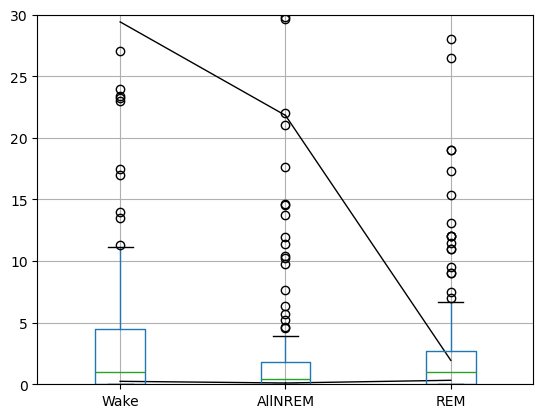

In [86]:
selected_columns=['Wake', 'AllNREM', 'REM']

# Add lines between columns
for i in range(len(selected_columns) - 1):
    plt.plot([i + 1, i + 2], [mean_by_mice[selected_columns[i]], mean_by_mice[selected_columns[i + 1]]], color='black', linestyle='-', linewidth=1)

df_UnitToKeep.boxplot(column=selected_columns)

plt.ylim(0, 30) 
plt.show()